In [339]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

###LMPD Data of Stops (2022)

In [340]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Final Project/LMPD_STOP_DATA_2022.csv")

In [341]:
data.head()

,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH
0,COMPLAINT/CRIMINAL VIOLATION,DU03293,CITATION ISSUED,M,WHITE,21 - 30,01/02/2022,21:44,M ST ...,4TH DIVISION,BEAT 4,M,WHITE,26 - 30,2,YES,NaN
1,COMPLAINT/CRIMINAL VIOLATION,DV75866,CITATION ISSUED,M,WHITE,51 - 60,07/21/2022,02:00,KEEGAN WAY ...,7TH DIVISION,BEAT 1,M,HISPANIC,16 - 19,1,YES,4.0
2,COMPLAINT/CRIMINAL VIOLATION,DV87754,CITATION ISSUED,M,WHITE,51 - 60,07/21/2022,02:00,KEEGAN WAY ...,7TH DIVISION,BEAT 1,M,HISPANIC,16 - 19,1,NO,NaN
3,COMPLAINT/CRIMINAL VIOLATION,DW19051,CITATION ISSUED,M,WHITE,21 - 30,01/25/2022,11:23,4500 BLOCK SOUTHERN PKWY,4TH DIVISION,BEAT 6,M,WHITE,20 - 25,0,YES,4.0
4,COMPLAINT/CRIMINAL VIOLATION,DX65321,CITATION ISSUED,M,WHITE,31 - 40,01/13/2022,05:30,PRESTON HWY @ OUTER LOOP ...,7TH DIVISION,BEAT 6,M,WHITE,51 - 60,1,YES,3.0


###General Cleaning

In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26814 entries, 0 to 26813
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TYPE_OF_STOP             26814 non-null  object 
 1   CITATION_CONTROL_NUMBER  26814 non-null  object 
 2   ACTIVITY RESULTS         26814 non-null  object 
 3   OFFICER_GENDER           26814 non-null  object 
 4   OFFICER_RACE             26814 non-null  object 
 5   OFFICER_AGE_RANGE        26814 non-null  object 
 6   ACTIVITY_DATE            26814 non-null  object 
 7   ACTIVITY_TIME            26814 non-null  object 
 8   ACTIVITY_LOCATION        26814 non-null  object 
 9   ACTIVITY_DIVISION        26814 non-null  object 
 10  ACTIVITY_BEAT            26814 non-null  object 
 11  DRIVER_GENDER            26814 non-null  object 
 12  DRIVER_RACE              26660 non-null  object 
 13  DRIVER_AGE_RANGE         26814 non-null  object 
 14  NUMBER OF PASSENGERS  

In [343]:
data.WAS_VEHCILE_SEARCHED.value_counts()

NO     25641
YES     1173
Name: WAS_VEHCILE_SEARCHED, dtype: int64

In [344]:
data.TYPE_OF_STOP.value_counts()

TRAFFIC VIOLATION               26752
COMPLAINT/CRIMINAL VIOLATION       54
COMPLIANCE STOP (KVE ONLY)          8
Name: TYPE_OF_STOP, dtype: int64

In [345]:
data["ACTIVITY RESULTS"].value_counts()

CITATION ISSUED    26814
Name: ACTIVITY RESULTS, dtype: int64

In [346]:
data.ACTIVITY_DATE.value_counts()

03/23/2022    287
09/28/2022    279
03/17/2022    275
01/18/2022    252
09/14/2022    247
             ... 
05/14/2022     10
10/30/2022      8
01/08/2022      7
01/01/2022      6
12/10/2022      1
Name: ACTIVITY_DATE, Length: 344, dtype: int64

In [347]:
data.ACTIVITY_TIME.value_counts()

14:09    57
14:00    54
10:18    52
10:32    51
14:20    50
         ..
06:30     1
03:12     1
07:01     1
05:05     1
06:58     1
Name: ACTIVITY_TIME, Length: 1437, dtype: int64

#Dropping irrelevent Columns

In [348]:
#dropping due to small ammount of variation of stops (most are Traffic Violation)
#'CITATION_CONTROL_NUMBER' due to all having diff numbers
#"ACTIVITY RESULTS" due to all having the same result (Citation issued)
#'ACTIVITY_TIME'&'ACTIVITY_LOCATION' too many variations
#'REASON_FOR_SEARCH' Too many NA's
data = data.drop(['TYPE_OF_STOP','CITATION_CONTROL_NUMBER','ACTIVITY RESULTS','ACTIVITY_DATE','ACTIVITY_TIME','ACTIVITY_LOCATION','REASON_FOR_SEARCH'], axis = 1)

In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26814 entries, 0 to 26813
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   OFFICER_GENDER        26814 non-null  object
 1   OFFICER_RACE          26814 non-null  object
 2   OFFICER_AGE_RANGE     26814 non-null  object
 3   ACTIVITY_DIVISION     26814 non-null  object
 4   ACTIVITY_BEAT         26814 non-null  object
 5   DRIVER_GENDER         26814 non-null  object
 6   DRIVER_RACE           26660 non-null  object
 7   DRIVER_AGE_RANGE      26814 non-null  object
 8   NUMBER OF PASSENGERS  26814 non-null  int64 
 9   WAS_VEHCILE_SEARCHED  26814 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.0+ MB


###Converting columns to dummy var

In [350]:
data.OFFICER_GENDER.value_counts()

M    26485
F      329
Name: OFFICER_GENDER, dtype: int64

In [351]:
data.OFFICER_RACE.value_counts()

WHITE       19872
BLACK        6472
HISPANIC      399
ASIAN          67
UNKNOWN         4
Name: OFFICER_RACE, dtype: int64

In [352]:
data.OFFICER_AGE_RANGE.value_counts()

51 - 60    7874
41 - 50    7854
31 - 40    5709
21 - 30    4524
OVER 60     625
61 - 70     228
Name: OFFICER_AGE_RANGE, dtype: int64

In [353]:
data.ACTIVITY_DIVISION.value_counts()

8TH DIVISION    5445
5TH DIVISION    4198
7TH DIVISION    3966
3RD DIVISION    3286
6TH DIVISION    3172
4TH DIVISION    2441
1ST DIVISION    1615
2ND DIVISION    1450
                1240
METRO              1
Name: ACTIVITY_DIVISION, dtype: int64

In [354]:
data.columns

Index(['OFFICER_GENDER', 'OFFICER_RACE', 'OFFICER_AGE_RANGE',
       'ACTIVITY_DIVISION', 'ACTIVITY_BEAT', 'DRIVER_GENDER', 'DRIVER_RACE',
       'DRIVER_AGE_RANGE', 'NUMBER OF PASSENGERS', 'WAS_VEHCILE_SEARCHED'],
      dtype='object')

In [355]:
data = pd.get_dummies(data[['OFFICER_GENDER', 'OFFICER_RACE', 'OFFICER_AGE_RANGE','ACTIVITY_DIVISION', 'ACTIVITY_BEAT',
       'DRIVER_GENDER', 'DRIVER_RACE', 'DRIVER_AGE_RANGE','WAS_VEHCILE_SEARCHED']], drop_first = True)

In [356]:
#data.REASON_FOR_SEARCH.value_counts()

In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26814 entries, 0 to 26813
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   OFFICER_GENDER_M                26814 non-null  uint8
 1   OFFICER_RACE_BLACK              26814 non-null  uint8
 2   OFFICER_RACE_HISPANIC           26814 non-null  uint8
 3   OFFICER_RACE_UNKNOWN            26814 non-null  uint8
 4   OFFICER_RACE_WHITE              26814 non-null  uint8
 5   OFFICER_AGE_RANGE_31 - 40       26814 non-null  uint8
 6   OFFICER_AGE_RANGE_41 - 50       26814 non-null  uint8
 7   OFFICER_AGE_RANGE_51 - 60       26814 non-null  uint8
 8   OFFICER_AGE_RANGE_61 - 70       26814 non-null  uint8
 9   OFFICER_AGE_RANGE_OVER 60       26814 non-null  uint8
 10  ACTIVITY_DIVISION_1ST DIVISION  26814 non-null  uint8
 11  ACTIVITY_DIVISION_2ND DIVISION  26814 non-null  uint8
 12  ACTIVITY_DIVISION_3RD DIVISION  26814 non-null  uint8
 13  A

###Splitting Data (X & y)

In [358]:
X = data.drop("WAS_VEHCILE_SEARCHED_YES", axis = 1)

In [359]:
y = data.WAS_VEHCILE_SEARCHED_YES

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0) 

##Model Training

###Model #1: Logistic Regression

In [361]:
from sklearn.linear_model import LogisticRegression
logistic_regressor=LogisticRegression(random_state = 0)

In [362]:
logistic_regressor.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [363]:
lr_trainS = logistic_regressor.score(X_train,y_train)
print(lr_trainS)

0.956272434851522


In [364]:
lr_testS = logistic_regressor.score(X_test,y_test)
print(lr_testS)

0.9561812418422525


####Model Validation

In [365]:
y_pred = logistic_regressor.predict(X_test)

In [366]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay, classification_report

In [367]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[5127    0]
 [ 235    1]]


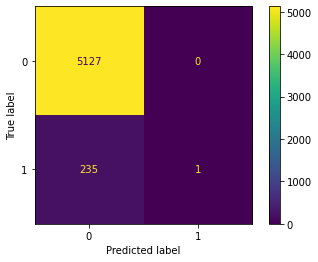

In [368]:
disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logistic_regressor.classes_)
disp_cm.plot()
plt.show()

In [369]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5127
           1       1.00      0.00      0.01       236

    accuracy                           0.96      5363
   macro avg       0.98      0.50      0.49      5363
weighted avg       0.96      0.96      0.93      5363



###Model #2: Decision Tree Classification

In [370]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  random_state = 0)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [371]:
DT_TrainS = DT.score(X_train,y_train)
print(DT_TrainS)

0.9574844995571302


In [372]:
DT_TestS = DT.score(X_test,y_test)
print(DT_TestS)

0.9573000186462801


[Text(0.5446428571428571, 0.9166666666666666, 'X[11] <= 0.5\ngini = 0.084\nsamples = 21451\nvalue = [20514, 937]'),
 Text(0.2857142857142857, 0.75, 'X[10] <= 0.5\ngini = 0.07\nsamples = 20288\nvalue = [19551, 737]'),
 Text(0.14285714285714285, 0.5833333333333334, 'X[13] <= 0.5\ngini = 0.059\nsamples = 19035\nvalue = [18454, 581]'),
 Text(0.07142857142857142, 0.4166666666666667, 'X[5] <= 0.5\ngini = 0.044\nsamples = 17055\nvalue = [16670, 385]'),
 Text(0.03571428571428571, 0.25, 'X[7] <= 0.5\ngini = 0.027\nsamples = 13823\nvalue = [13637, 186]'),
 Text(0.017857142857142856, 0.08333333333333333, 'gini = 0.045\nsamples = 7791\nvalue = [7610, 181]'),
 Text(0.05357142857142857, 0.08333333333333333, 'gini = 0.002\nsamples = 6032\nvalue = [6027, 5]'),
 Text(0.10714285714285714, 0.25, 'X[12] <= 0.5\ngini = 0.116\nsamples = 3232\nvalue = [3033, 199]'),
 Text(0.08928571428571429, 0.08333333333333333, 'gini = 0.079\nsamples = 2345\nvalue = [2248, 97]'),
 Text(0.125, 0.08333333333333333, 'gini = 0

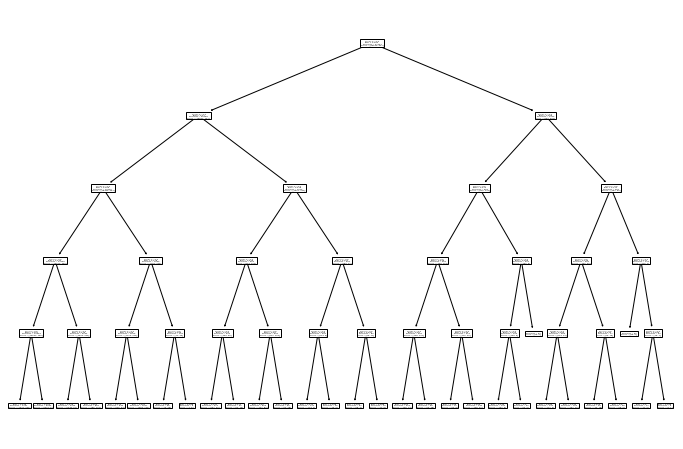

In [373]:
plt.figure(figsize = (12,8))
from sklearn import tree
tree.plot_tree(DT.fit(X_train,y_train))

####Validation

In [374]:
y_pred = DT.predict(X_test)

In [375]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[5121    6]
 [ 223   13]]


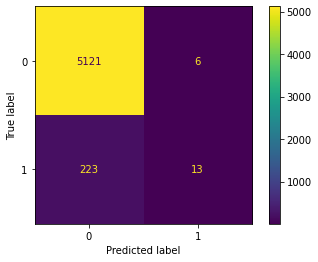

In [376]:
disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logistic_regressor.classes_)
disp_cm.plot()
plt.show()

In [377]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5127
           1       0.68      0.06      0.10       236

    accuracy                           0.96      5363
   macro avg       0.82      0.53      0.54      5363
weighted avg       0.95      0.96      0.94      5363



###Model #3: Random Forest Classifier

In [378]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 500)

In [379]:
RFC.fit(X_train,y_train)
RFC_TrainS = RFC.score(X_train,y_train)
print(RFC_TrainS)

0.9726819262505244


In [380]:
RFC_TestS = RFC.score(X_test,y_test)
print(RFC_TestS)

0.953757225433526


####Validation

In [381]:
y_pred = RFC.predict(X_test)

In [382]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[5067   60]
 [ 188   48]]


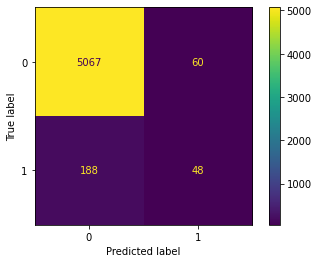

In [383]:
disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logistic_regressor.classes_)
disp_cm.plot()
plt.show()

In [384]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5127
           1       0.44      0.20      0.28       236

    accuracy                           0.95      5363
   macro avg       0.70      0.60      0.63      5363
weighted avg       0.94      0.95      0.95      5363



###Model #4: Support Vector Classifier

In [385]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train, y_train)

SVC()

In [386]:
SVC_TrainS = SVC_model.score(X_train, y_train)
print(SVC_TrainS)

0.9567852314577409


In [387]:
SVC_TestS = SVC_model.score(X_test, y_test)
print(SVC_TestS)

0.9563677046429238


####Validation

In [388]:
y_pred = SVC_model.predict(X_test)

In [389]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[5127    0]
 [ 234    2]]


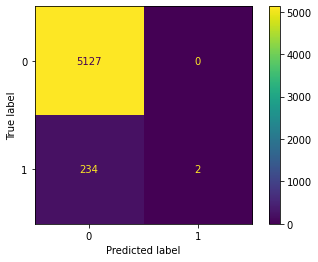

In [390]:
disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logistic_regressor.classes_)
disp_cm.plot()
plt.show()

In [391]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5127
           1       1.00      0.01      0.02       236

    accuracy                           0.96      5363
   macro avg       0.98      0.50      0.50      5363
weighted avg       0.96      0.96      0.94      5363



###Model #5: Artifical Neural Network/ MLP

In [392]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = Sequential()

model.add(Dense(150, activation='relu', 
                       input_shape=(n_cols,)))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 150)               5850      
                                                                 
 dense_25 (Dense)            (None, 150)               22650     
                                                                 
 dense_26 (Dense)            (None, 150)               22650     
                                                                 
 dense_27 (Dense)            (None, 150)               22650     
                                                                 
 dense_28 (Dense)            (None, 150)               22650     
                                                                 
 dense_29 (Dense)            (None, 1)                 151       
                                                                 
Total params: 96,601
Trainable params: 96,601
Non-trai

In [393]:
from keras.callbacks import EarlyStopping
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=30) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=40, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/40
537/537 [==============================] - 2s 4ms/step - loss: 0.0380 - mae: 0.0791 - val_loss: 0.0391 - val_mae: 0.0641
Epoch 2/40
537/537 [==============================] - 2s 3ms/step - loss: 0.0363 - mae: 0.0743 - val_loss: 0.0370 - val_mae: 0.0731
Epoch 3/40
537/537 [==============================] - 2s 3ms/step - loss: 0.0353 - mae: 0.0728 - val_loss: 0.0363 - val_mae: 0.0783
Epoch 4/40
537/537 [==============================] - 2s 3ms/step - loss: 0.0348 - mae: 0.0720 - val_loss: 0.0363 - val_mae: 0.0743
Epoch 5/40
537/537 [==============================] - 2s 3ms/step - loss: 0.0340 - mae: 0.0714 - val_loss: 0.0353 - val_mae: 0.0702
Epoch 6/40
537/537 [==============================] - 2s 3ms/step - loss: 0.0332 - mae: 0.0689 - val_loss: 0.0363 - val_mae: 0.0692
Epoch 7/40
537/537 [==============================] - 2s 3ms/step - loss: 0.0326 - mae: 0.0681 - val_loss: 0.0358 - val_mae: 0.0898
Epoch 8/40
537/537 [==============================] - 2s 3ms/step - loss: 0.

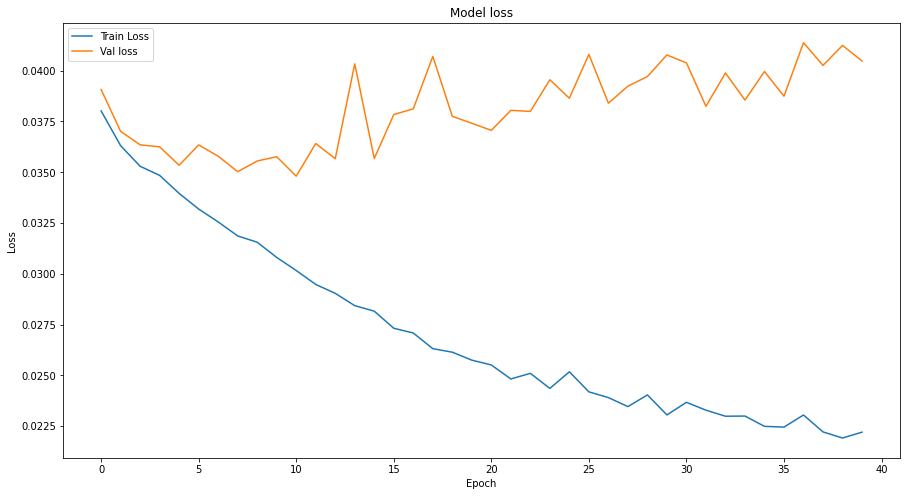

In [394]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Loss') #MSE
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [395]:
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0]) #MSE
print('Mean absolute error: ', score[1])

168/168 [==============================] - 0s 1ms/step - loss: 0.0409 - mae: 0.0619
loss value:  0.04093257337808609
Mean absolute error:  0.061884913593530655


In [396]:
ann_mae = score[1]

####Validation

In [397]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

168/168 [==============================] - 0s 1ms/step


In [398]:
confusion_matrix(y_test,y_pred)

array([[5048,   79],
       [ 187,   49]])

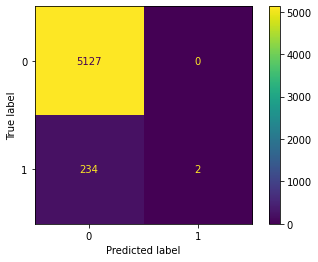

In [399]:
disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logistic_regressor.classes_)
disp_cm.plot()
plt.show()

In [400]:
print(classification_report(y_test,y_pred))
ann_Score = 0.95

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5127
           1       0.38      0.21      0.27       236

    accuracy                           0.95      5363
   macro avg       0.67      0.60      0.62      5363
weighted avg       0.94      0.95      0.94      5363



###Pretty Table

In [401]:
from prettytable import PrettyTable as pt
table = pt(["Type of Test", "Train Score", "Test Score"])

In [402]:
table.add_row(["Logistic Regression",lr_trainS,lr_testS])
table.add_row(["Decision Tree",DT_TrainS,DT_TestS])
table.add_row(["Random Forest",RFC_TrainS,RFC_TestS])
table.add_row(["Support Vector Machine Classifier",SVC_TrainS,SVC_TestS])
table.add_row(["Artificial Neural Network",ann_Score,"unkown"])

In [403]:
print(table)

+-----------------------------------+--------------------+--------------------+
|            Type of Test           |    Train Score     |     Test Score     |
+-----------------------------------+--------------------+--------------------+
|        Logistic Regression        | 0.956272434851522  | 0.9561812418422525 |
|           Decision Tree           | 0.9574844995571302 | 0.9573000186462801 |
|           Random Forest           | 0.9726819262505244 | 0.953757225433526  |
| Support Vector Machine Classifier | 0.9567852314577409 | 0.9563677046429238 |
|     Artificial Neural Network     |        0.95        |       unkown       |
+-----------------------------------+--------------------+--------------------+
